### Personal message

Hi Svetlana,

I did the required changes, I hope it's OK now.

Thanks in advance,

Yonatan

Hi Yonatan. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

You've worked really hard and submitted a solid project. While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. You're almost there! 
    
## Review v. 2<a class="tocSkip">
    
All your hard work has paid off, and now your project is perfect! I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!

# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Table Of Contents 
<a class="anchor" id="table_of_contents"></a>
- [Introduction](#introduction)

- [Open the data file and study the general information](#open_file)

- [Data preprocessing](#data_preprocessing)
 - [missing values](#missing_values)
 - [Descriptive statistics](#descriptive)
 - [Checking and converting data types](#convert)

- [Make calculations and add them to the table](#calculations)

- [Carry out exploratory data analysis](#eda)
 - [Determining the upper limits of outliers](#limits)

- [Overall conclusion](#conclusion)

- [Project completion checklist](#checklist)

##  Introduction
<a class="anchor" id="introduction"></a> 
[Go back to the Table of Contents](#table_of_contents) 

In this project, I will explore advertisements for vehicles dataset and try to explain the different findings. There are several factors influencing the price of a vehicle, I will give my explanations to the probable links of these factors to the price.

I will start with preprocessing of the dataset: missing values, duplicates etc. 

The next step will be plotting the different variables with: scatter plot, box plot etc.

Finally, I will conclude the whole process in relation to the research question:

   * Which factors influence the price of a vehicle?



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described the project.
</div>

## Open the data file and study the general information. 
<a class="anchor" id="open_file"></a> 
[Go back to the Table of Contents](#table_of_contents) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/Users/yonatan/Desktop/Practicum/Sprint 3 - Exploratory Data Analysis (EDA)/Project -Exploratory Data Analysis (EDA)/vehicles_us.csv')

except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using try-except for the path to the file.
</div>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion

Problems in the dataset: NaNs in several columns, some columns need to be converted to other data types (for example: date_posted - from object to date).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted a problem with a missing values.
</div>

## Data preprocessing
<a class="anchor" id="data_preprocessing"></a> 
[Go back to the Table of Contents](#table_of_contents) 

### Missing values
<a class="anchor" id="missing_values"></a> 
[Go back to the Table of Contents](#table_of_contents) 

In [3]:
df.isnull().sum()/len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please calculate the percentage of a missing values? It's important to know when making decision about processing of a missing values.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you calculated the percentage of a missing values. This is important to know when making a decision on processing a missing values.
</div>

We have here 5 columns with missing values (percentage of missing values): model_year (7%), cylinders (10%), odometer (15%), paint_color(17%) and is_4wd (50%).

Possible explanations to missing values:
* People forgot to enter the model year of the vehicle.
* People don't know how many cylinders the vehicle has.
* People don't want potential buyers to know the vehicle's number of kilometers, especially if the odometer's number is high.
* People don't want to write the vehicle's color, especially if the color isn't attractive.
* The zeros in is_4wd are missing because of machine or human error. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable explanations :)
</div>

* Let's see the the decriptive statistics of the datset:

### Descriptive statistics
<a class="anchor" id="descriptive"></a> 
[Go back to the Table of Contents](#table_of_contents) 

In [4]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


#### Checking model_year column

* As we can see, the median and the mean are close, so we can fill in the missing values with each of them. 

* Let's fill in the missing values with the median:

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right.
</div>

In [5]:
model_year_median = df['model_year'].median()
df.loc[df['model_year'].isnull(), 'model_year'] = model_year_median

* Checking again:

In [6]:
len(df[df['model_year'].isnull()])

0

* Done.

#### Checking cylinders column

* As we can see, the median and the mean are close, so we can fill in the missing values with both of them. Let's fill in the missing values with the median:

In [7]:
cylinders_median = df['cylinders'].median()
df.loc[df['cylinders'].isnull(), 'cylinders'] = cylinders_median

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

* Checking again:

In [8]:
len(df[df['cylinders'].isnull()])

0

Done.

#### Checking is_4wd column

* Let's see wich unique values are in this column:

In [9]:
df['is_4wd'][df['is_4wd'].notnull()].unique()

array([1.])

* As we can see, the only value in this column is 1.0. Because there only two possible values, it is reasonable that the missing values here are the zeros. 

* Filling in the missing values in is_4wd with 0:

In [10]:
df.loc[df['is_4wd'].isnull(), 'is_4wd'] = 0

* Checking again:

In [11]:
len(df[df['is_4wd'].isnull()])

0

* Done.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you explained why you filled missing values in the "is_4wd" column with zeros. 
</div>

#### Checking odometer column

* As we can see, the median and the mean are close, so we can fill in the missing values with both of them. Let's fill in the missing values with the median:

In [12]:
odometer_median = df['odometer'].median()
df.loc[df['odometer'].isnull(), 'odometer'] = odometer_median

* Checking again:

In [13]:
len(df[df['odometer'].isnull()])

0

* Done

#### Checking paint_color column

* Checking paint_color's values frequency:

In [14]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

* As we can see, the most common value in this column is white. In this case, I won't fill in the missing values with white (there are 9267 of them and it's a categorical variable). 

#### Final checking for missing values

In [15]:
df.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

* Everything is OK.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Great, now we don't have a missing values.
</div>

### Checking and converting data types
<a class="anchor" id="convert"></a> 
[Go back to the Table of Contents](#table_of_contents) 

* Lowering the strings in object data types:

In [16]:
df['model'] = df['model'].str.lower()
df['condition'] = df['condition'].str.lower()
df['fuel'] = df['fuel'].str.lower()
df['transmission'] = df['transmission'].str.lower()
df['type'] = df['type'].str.lower()
df['paint_color'] = df['paint_color'].str.lower()
df['date_posted'] = df['date_posted'].str.lower()

* Checking for duplicates

In [17]:
df.duplicated().sum()

0

* No duplicates in the dataset.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have duplicates in our data.
</div>

Let's change the data types of our columns according to their values: 
* int8: cylinders (the maximum cylinders is 12).
* int16: days_listed (the maximum days listed is 271).
* int32: price, odometer (the maximum values are 375000 and 990000 respectively).
* category: paint_color, type, transmission, fuel, condition, model (they are all categorical variables).
* boolean: is_4wd (only 2 options).
* datetime64: date_posted, model_year (in order to make calculations of date).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
In case of large datasets optimization of the data type is a good practice.

Please see for details: https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e
</div>

In [18]:
df = df.astype({'price':'int32', 'model':'category', 'condition':'category', 'cylinders':'int8', 'fuel':'category','odometer':'int32', 'transmission':'category', 'type':'category', 'paint_color':'category', 'is_4wd':'bool', 'days_listed':'int16'})

In [19]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format="%Y-%m-%d")

In [20]:
df['model_year'] = pd.to_datetime(df['model_year'], format="%Y")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int32
model_year      51525 non-null datetime64[ns]
model           51525 non-null category
condition       51525 non-null category
cylinders       51525 non-null int8
fuel            51525 non-null category
odometer        51525 non-null int32
transmission    51525 non-null category
type            51525 non-null category
paint_color     42258 non-null category
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int16
dtypes: bool(1), category(6), datetime64[ns](2), int16(1), int32(2), int8(1)
memory usage: 1.7 MB


Ok, the data types have changed as we wanted. All set for the next step!

### Conclusion

In the preprocessing part:
* I found and replaced the following missing values: model_year, cylinders, odometer, is_4wd.
* I found no duplicates.
* I changed the data types of the following columns:cylinders, days_listed, price, odometer, paint_color, type, transmission, fuel, condition, model, is_4wd, date_posted, model_year.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you clearly described main results of this part of the project.
</div>

## Make calculations and add them to the table
<a class="anchor" id="calculations"></a> 
[Go back to the Table of Contents](#table_of_contents) 

### Adding day of the week, month, and year

In [22]:
df['day_of_week'] = df['date_posted'].dt.weekday

In [23]:
df['month'] = df['date_posted'].dt.month

In [24]:
df['year'] = df['date_posted'].dt.year

### Adding vehicle's age

In [25]:
df['age'] = df['year'] - df['model_year'].dt.year

### Adding vehicle's average mileage per year

In [26]:
def average_year_mileage(row):
    if row['age'] != 0:
        return row['odometer'] / row['age']
    else:
        return row['odometer']

df['average_year_mileage'] = df.apply(average_year_mileage, axis=1)

In [27]:
df['average_year_mileage'].describe()

count     51525.000000
mean      19129.552314
std       16864.127228
min           0.000000
25%       10360.444444
50%       15161.285714
75%       22221.428571
max      373200.000000
Name: average_year_mileage, dtype: float64

### Replacing string values with a numeric scale in the condition  column

In [28]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [29]:
def to_numeric(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    else:
        return 0

df['condition'] = df['condition'].apply(to_numeric)
df['condition'] = df['condition'].astype('int8')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's necessary to convert the condition column to a numeric scale.
</div>

In [30]:
df.head()
df['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

The strings in condition column were replaced by numbers and the data type was changed as well.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, lets move to the data analysis.
</div>

## Carry out exploratory data analysis
<a class="anchor" id="eda"></a> 
[Go back to the Table of Contents](#table_of_contents) 

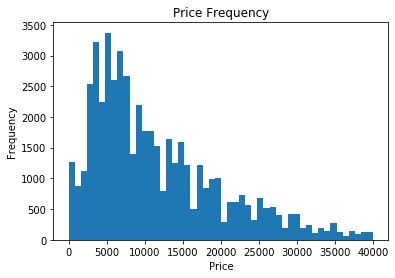

In [31]:
df['price'].plot(kind='hist', title='Price Frequency', bins=50, range=(0, 40000))
plt.xlabel('Price')
plt.show()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you didn't forget the axis labels and the title to the graph.
</div>

There are significant ouliers here. Without the range parameter the maximum in the x axis is 350,000 and you just see a spike. The range limit makes it possible to see the ditribution in more detail.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you analyzed the graph in details.
</div>

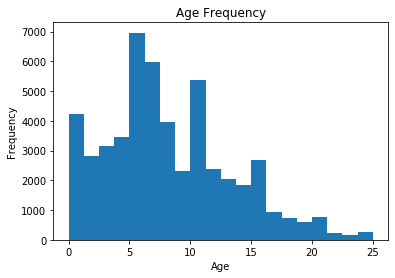

In [32]:
df['age'].plot(kind='hist', title='Age Frequency', range=(0, 25), bins=20)
plt.xlabel('Age')
plt.show()

Without the range parameter the maximum in the x axis is 100. After changing the range, we can see what vehicle's age most of people are looking for.

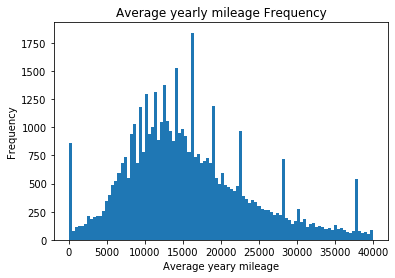

In [33]:
df['average_year_mileage'].plot(kind='hist', title='Average yearly mileage Frequency', bins=100, range=(0, 40000))
plt.xlabel('Average yeary mileage')
plt.show()

The maximum value on x axis without the range is 350,000. After changing the range, we can see the main distibution.

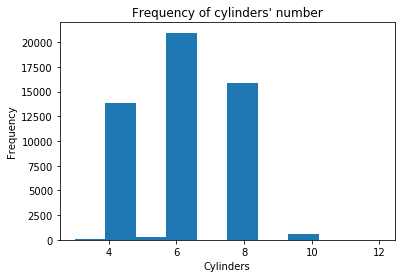

In [34]:
df['cylinders'].plot(kind='hist', title="Frequency of cylinders' number")
plt.xlabel('Cylinders')
plt.show()

The maximum value of cylenders in this plot is 12, so we don't need to change the range.

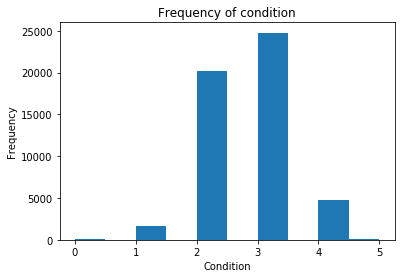

In [35]:
df['condition'].plot(kind='hist', title='Frequency of condition')
plt.xlabel('Condition')
plt.show()

The maximum value here is 5, so we don't need to change the range.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It will be better to analyse the type of distributions.
    
Please see for details: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

### Determining the upper limits of outliers
<a class="anchor" id="limits"></a> 
[Go back to the Table of Contents](#table_of_contents) 

In [36]:
# IQR = Q3 — Q1
# Q1–1.5 * IQR, Q3 + 1.5 * IQR
limits_dict = {}
for column in ['price', 'age', 'average_year_mileage', 'cylinders', 'condition']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 
    limits_dict["{}_lower_lim".format(column)] = Q1 - 1.5 * IQR
    limits_dict["{}_upper_lim".format(column)] = Q3 + 1.5 * IQR

limits_dict

{'price_lower_lim': -12758.5,
 'price_upper_lim': 34597.5,
 'age_lower_lim': -8.0,
 'age_upper_lim': 24.0,
 'average_year_mileage_lower_lim': -7431.031746031746,
 'average_year_mileage_upper_lim': 40012.90476190476,
 'cylinders_lower_lim': -2.0,
 'cylinders_upper_lim': 14.0,
 'condition_lower_lim': 0.5,
 'condition_upper_lim': 4.5}

### Saving filtered data and outliers in separate DataFrames

In [37]:
filtered_data = df.query('price < 34597.5 and age < 24 and average_year_mileage < 40012.9 and 0.5 < condition < 4.5')
outliers = df.query('price > 34597.5 or age > 24 or average_year_mileage > 40012.9 or 0.5 > condition or condition > 4.5 ')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you clearly analysed an outliers.
    
Maybe this link will be interesting for you: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

### Histograms of filtered data

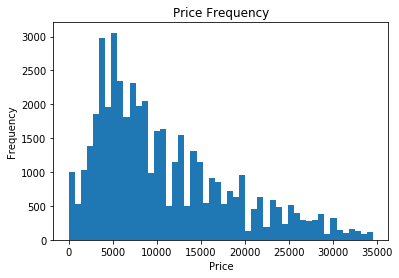

In [38]:
filtered_data['price'].plot(kind='hist', title='Price Frequency', bins=50)
plt.xlabel('Price')
plt.show()

I don't see a significant difference between the price histograms with and without outliers.

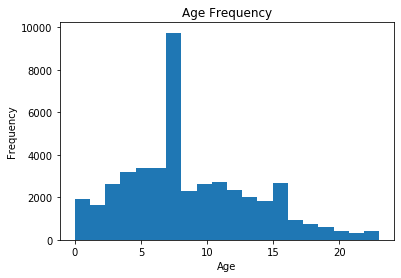

In [39]:
filtered_data['age'].plot(kind='hist', title='Age Frequency', bins=20)
plt.xlabel('Age')
plt.show()

There are some differences here: less ouliers means less spikes.

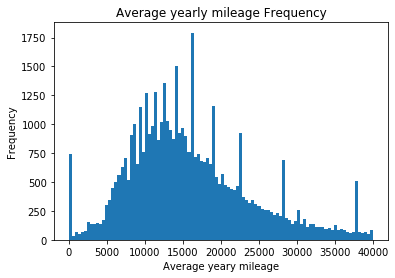

In [40]:
filtered_data['average_year_mileage'].plot(kind='hist', title='Average yearly mileage Frequency', range=(0, 40000), bins=100)
plt.xlabel('Average yeary mileage')
plt.show()

Looks very similar to the equivalent histogram with ouliers.

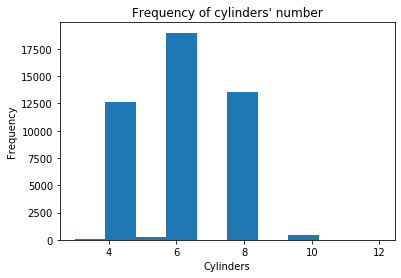

In [41]:
filtered_data['cylinders'].plot(kind='hist', title="Frequency of cylinders' number")
plt.xlabel('Cylinders')
plt.show()

Looks the same as the equivalent cylenders histogram. The only differece is the frequency's maximum value: 17,500 vs 20,000.

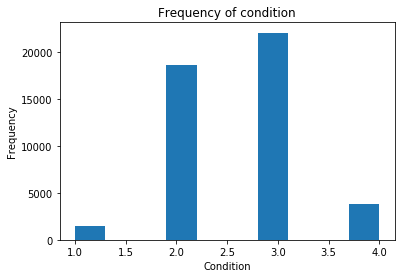

In [42]:
filtered_data['condition'].plot(kind='hist', title='Frequency of condition')
plt.xlabel('Condition')
plt.show()

The difference here is the maximum value on the frequency axis: 20000 vs 25000.

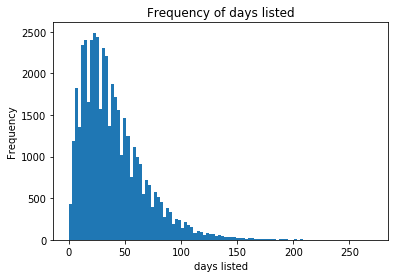

In [43]:
filtered_data['days_listed'].plot(kind='hist', title='Frequency of days listed', bins=100)
plt.xlabel('days listed')
plt.show()

In [44]:
filtered_data['days_listed'].describe()

count    45882.000000
mean        39.561113
std         28.233934
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

As we can see above, the typical lifetime of an ad is something around 39 (mean).

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please clarify which value are you going to choose as typical lifetime of an ad?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

Let's check the correlation between the different factors in relation to days_listed:

In [45]:
filtered_data.corr()

,price,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,age,average_year_mileage
price,1.000000,0.190576,0.289269,-0.409840,0.334687,-0.001795,0.000469,-0.022764,0.021383,-0.501243,0.199497
condition,0.190576,1.000000,-0.074372,-0.268412,-0.000192,0.001174,0.004339,-0.008960,0.009087,-0.274624,0.055772
cylinders,0.289269,-0.074372,1.000000,0.110772,0.389290,0.005006,-0.004664,0.002893,-0.002096,0.145236,-0.047675
odometer,-0.409840,-0.268412,0.110772,1.000000,0.054578,0.006856,0.002797,0.017652,-0.013354,0.541981,0.237256
is_4wd,0.334687,-0.000192,0.389290,0.054578,1.000000,0.004083,0.004799,0.004388,-0.002044,0.018148,0.044836
days_listed,-0.001795,0.001174,0.005006,0.006856,0.004083,1.000000,0.002787,-0.010961,0.011779,0.002907,0.001127
day_of_week,0.000469,0.004339,-0.004664,0.002797,0.004799,0.002787,1.000000,0.006804,-0.006592,-0.000236,-0.000641
month,-0.022764,-0.008960,0.002893,0.017652,0.004388,-0.010961,0.006804,1.000000,-0.820952,-0.037468,0.080111
year,0.021383,0.009087,-0.002096,-0.013354,-0.002044,0.011779,-0.006592,-0.820952,1.000000,0.053156,-0.096771
age,-0.501243,-0.274624,0.145236,0.541981,0.018148,0.002907,-0.000236,-0.037468,0.053156,1.000000,-0.544039


As we can see above, there are correlations between several different factors to days_listed:
* age (-0.5)
* odometer (-0.4)
* cylinders (0.28)
* is_4wd (0.33)
* condition (0.19)
* average_year_mileage (0.19)

Let's take a closer look at low (below Q1) and high (above Q3) sections of days_listed in the distribution: 

In [46]:
Q1 = filtered_data['days_listed'].quantile(0.25)
Q3 = filtered_data['days_listed'].quantile(0.75)
short_time = filtered_data.query('days_listed < @Q1')
long_time = filtered_data.query('days_listed > @Q3')

In [47]:
short_time['days_listed'].describe()

count    11194.000000
mean        11.119707
std          4.679714
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: days_listed, dtype: float64

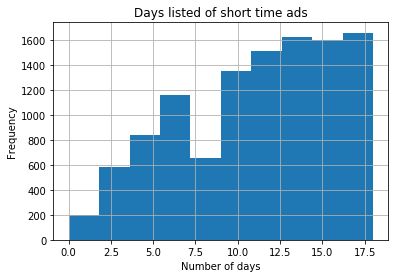

In [48]:
short_time['days_listed'].hist()
plt.title('Days listed of short time ads')
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.show()

Short time ads have an average of 11 days (and a median of 12), which means this is a typical lifetime of a short time ad.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

In [49]:
long_time['days_listed'].describe()

count    11419.000000
mean        78.761187
std         24.398193
min         54.000000
25%         61.000000
50%         72.000000
75%         89.000000
max        271.000000
Name: days_listed, dtype: float64

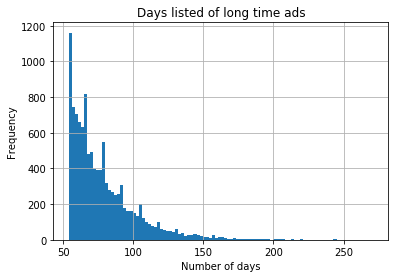

In [50]:
long_time['days_listed'].hist(bins=100)
plt.title('Days listed of long time ads')
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.show()

Long time ads have an average of 78 days (and a median of 72), which means this is a typical lifetime of a long time ad.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please describe when ads were removed quickly, and when they were listed for an abnormally long time? Please explain your choice.
</div>

*I hope the cells above is what you meant, if not - please be more specific.*

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you chose when ads were removed quickly, and when they were listed for an abnormally long time and explained this choice.
</div>

### Analyzing the number of ads and the average price for each type of vehicle

In [51]:
ads_type_price = pd.pivot_table(filtered_data, values='price', index='type', aggfunc=['mean', 'count'])
ads_type_price.columns = ['mean price', 'number of ads']
ads_type_price.reset_index(inplace=True)
ads_type_price.sort_values(by='number of ads', inplace=True)
ads_type_price

,type,mean price,number of ads
0,bus,18107.428571,21
5,offroad,13812.944134,179
6,other,9911.775229,218
1,convertible,12948.642202,327
11,van,8262.089908,545
3,hatchback,6555.308824,952
4,mini-van,7561.373953,1075
12,wagon,8691.236130,1478
2,coupe,12947.608059,1911
7,pickup,14406.490900,6044


Let's see if there any correlation between mean price and number af ads:

In [52]:
ads_type_price.corr()

,mean price,number of ads
mean price,1.000000,-0.074218
number of ads,-0.074218,1.000000


As we can see, There is no correlation here.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right :)
</div>

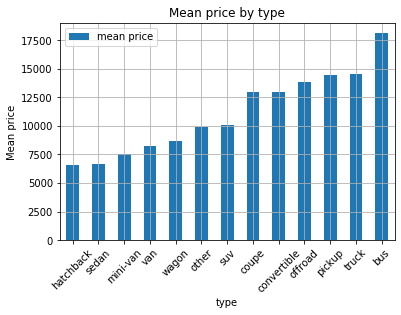

In [53]:
ads_type_price.sort_values(by='mean price').plot(x='type', y='mean price', kind='bar', rot=45, grid=True)
plt.title('Mean price by type')
plt.ylabel('Mean price')
plt.show()

We can see that the mean price changes according to the vehicle type.

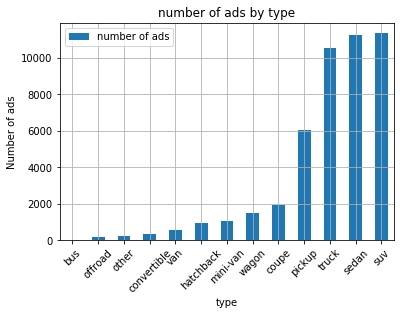

In [54]:
ads_type_price.plot(x='type', y='number of ads', kind='bar', rot=45, grid=True)
plt.title('number of ads by type')
plt.ylabel('Number of ads')
plt.show()

There is a great difference between the popularity (or advertisement) of different types.

The two types with the greatest number of ads are: sedan and SUV.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, SUVs and Sedans have the largest number of ads.
</div>

* What factors impact the price most? Take **each of the popular types** you 
detected at the previous stage and study whether the price depends on 
age, mileage, condition, transmission type, and color.

#### Sedan analysis

In [55]:
sedan_df = filtered_data.query('type == "sedan"')
sedan_df.corr()

,price,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,age,average_year_mileage
price,1.000000,0.292925,-0.023318,-0.530176,0.057687,0.000931,-0.003256,-0.042944,0.037770,-0.608685,0.209320
condition,0.292925,1.000000,-0.037735,-0.316549,0.021506,-0.006520,-0.002506,-0.007436,0.010655,-0.294255,0.038839
cylinders,-0.023318,-0.037735,1.000000,0.049129,0.183372,0.007518,-0.002481,-0.003763,0.002330,0.101459,-0.067244
odometer,-0.530176,-0.316549,0.049129,1.000000,-0.051146,0.008155,0.002154,0.021288,-0.013293,0.558843,0.228468
is_4wd,0.057687,0.021506,0.183372,-0.051146,1.000000,0.004433,-0.020890,0.008858,-0.003422,-0.070592,0.028467
days_listed,0.000931,-0.006520,0.007518,0.008155,0.004433,1.000000,0.013382,-0.009227,0.014553,0.002329,0.003285
day_of_week,-0.003256,-0.002506,-0.002481,0.002154,-0.020890,0.013382,1.000000,0.005503,-0.006033,-0.000900,0.005337
month,-0.042944,-0.007436,-0.003763,0.021288,0.008858,-0.009227,0.005503,1.000000,-0.821706,-0.037015,0.080447
year,0.037770,0.010655,0.002330,-0.013293,-0.003422,0.014553,-0.006033,-0.821706,1.000000,0.057059,-0.098239
age,-0.608685,-0.294255,0.101459,0.558843,-0.070592,0.002329,-0.000900,-0.037015,0.057059,1.000000,-0.534587


We can see from the table above some correlations:
* Age has a relatively strong negative correlation of -0.6 with the price, which means that the price decreases when the age proceeds.
* Average yearly mileage has a weak positive correlation of 0.2 with the price. It is a little strange to see that, because normally the price decreases as the mileage higher.
* Condition has also a weak positive correlation of 0.29 with the price, which means that the price increases when the condition better.
* The other correlations are too weak.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using a correlation function. But please note that correlation function shows only linear dependecy between variables. Maybe this link will be interesting for you: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.
</div>

In [56]:
sedan_df['transmission'].value_counts()

automatic    10571
manual         568
other          110
Name: transmission, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 40000)

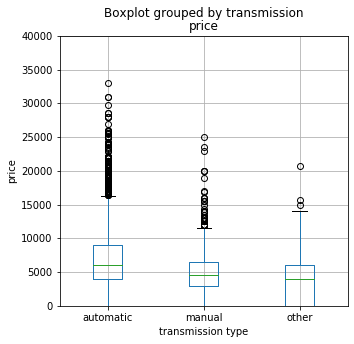

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
sedan_df.boxplot(column=['price'], by='transmission', grid=True, ax=ax)
plt.ylabel('price')
plt.xlabel('transmission type')
plt.ylim(0, 40000)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that as Data Analyst you should describe graphs in details and make a corresponding conclusion.
</div>

We can see clearly that there is a differeces between the prices of different transmission types. Automatic type has the highest median price (over 5000), the next one is manual type with median price of almost 5000 and the lowest median price is of other (below 5000)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

In [58]:
sedan_df['paint_color'].value_counts()

silver    1902
black     1621
grey      1497
white     1389
blue      1166
red        886
custom     267
brown      248
green      199
purple      26
yellow      22
orange       9
Name: paint_color, dtype: int64

We can see that there are less than 50 ads with each of the following colors: purple, yellow and orange. So they won't be included in our boxplot.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

Thanks :)

In [59]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

(0, 20000)

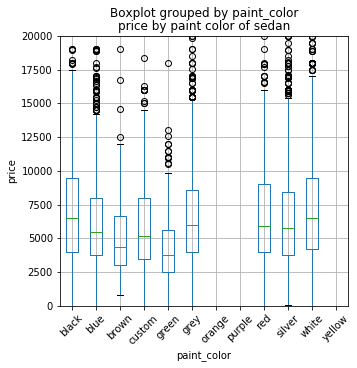

In [60]:
sedan_filtered_color = sedan_df[sedan_df.paint_color.isin(["purple", "yellow", "orange"]) == False]
fig, ax = plt.subplots(figsize=(5,5))
sedan_filtered_color.sort_values(by='price').boxplot(column=['price'], by='paint_color', grid=True, rot=45, ax=ax)
plt.title('price by paint color of sedan')
plt.ylabel('price')
plt.ylim(0, 20000)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please fix the overlapping of titles on the graph.
</div>

We can see some differences in prices for different colors, but it doesn't look significant.

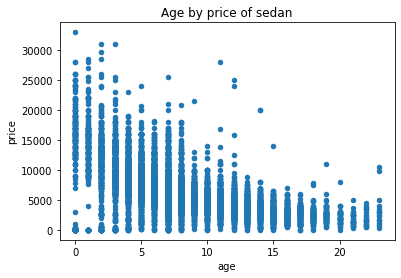

In [61]:
sedan_df.plot(x='age', y='price', kind='scatter')
plt.title('Age by price of sedan')
plt.show()

As mentioned above, we can see clear correlation between age and price.

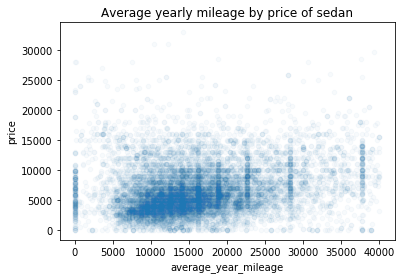

In [62]:
sedan_df.plot(x='average_year_mileage', y='price', kind='scatter', alpha=0.03) 
plt.title('Average yearly mileage by price of sedan')
plt.show()

As we see, there is no clear correlation between price and age.

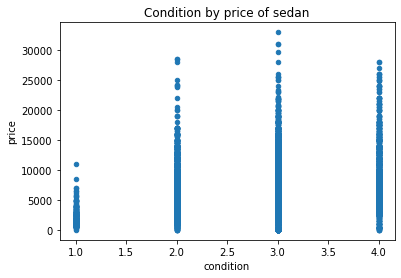

In [63]:
sedan_df.plot(x='condition', y='price', kind='scatter') 
plt.title('Condition by price of sedan')
plt.show()

As we see, the correlation between price and condition is not strong. Condition 1 is cheaper, but the other conditions are quite similar in price.

#### SUV analysis

In [64]:
suv_df = filtered_data.query('type == "suv"')
suv_df.corr()

,price,condition,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,age,average_year_mileage
price,1.000000,0.263186,0.007359,-0.481829,0.121597,-0.022554,0.009404,-0.018428,0.014768,-0.569037,0.262868
condition,0.263186,1.000000,-0.089064,-0.310155,-0.011624,-0.011913,0.010204,-0.002889,0.001546,-0.305976,0.053775
cylinders,0.007359,-0.089064,1.000000,0.206713,0.115059,0.011688,-0.010195,0.004828,-0.008323,0.235583,-0.080078
odometer,-0.481829,-0.310155,0.206713,1.000000,0.026702,0.013854,0.010162,0.018786,-0.015252,0.553936,0.179027
is_4wd,0.121597,-0.011624,0.115059,0.026702,1.000000,-0.004594,0.015328,-0.000903,-0.004305,0.064954,-0.027338
days_listed,-0.022554,-0.011913,0.011688,0.013854,-0.004594,1.000000,-0.006388,-0.005132,-0.000479,0.016980,-0.006278
day_of_week,0.009404,0.010204,-0.010195,0.010162,0.015328,-0.006388,1.000000,0.023172,-0.018999,-0.000224,0.003981
month,-0.018428,-0.002889,0.004828,0.018786,-0.000903,-0.005132,0.023172,1.000000,-0.819970,-0.047921,0.094248
year,0.014768,0.001546,-0.008323,-0.015252,-0.004305,-0.000479,-0.018999,-0.819970,1.000000,0.067026,-0.115464
age,-0.569037,-0.305976,0.235583,0.553936,0.064954,0.016980,-0.000224,-0.047921,0.067026,1.000000,-0.583942


We can see from the table above several correlations with the price:
* The strongest (negative) correlation is the age (-0.56), like we saw in the previous table. 
* Next is odometer (-0.48), a negative correlation, which means that the price decrease when the odometer increases.
*  Condition and average_year_mileage have similar correlation of 0.26. Correlation of the price with condition is reasonable, but here too we see a strange weak correlation with average_year_mileage.
* Maybe we can mention here the weak correlation with is_4wd (0.12), which means that the price increase if the car 4wd.
* The other correlations are too weak.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you analysed correlations in details.
</div>

In [65]:
suv_df['transmission'].value_counts()

automatic    10752
manual         457
other          140
Name: transmission, dtype: int64

(0, 40000)

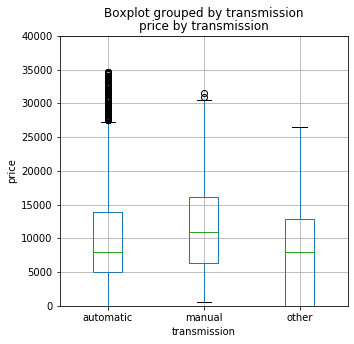

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
suv_df.boxplot(column=['price'], by='transmission', grid=True, ax=ax)
plt.title("price by transmission")
plt.ylabel('price')
plt.ylim(0, 40000)

According to the boxplot, there is some differences in price between the different transmission types, but it doesn't look significant.

In [67]:
suv_df['paint_color'].value_counts()

black     1977
white     1761
silver    1465
grey      1085
blue       971
red        843
green      415
brown      353
custom     290
orange      74
yellow      43
purple      38
Name: paint_color, dtype: int64

We can see that there are less than 50 ads with each of the following colors: purple, yellow. So they won't be included in our boxplot.

(0, 50000)

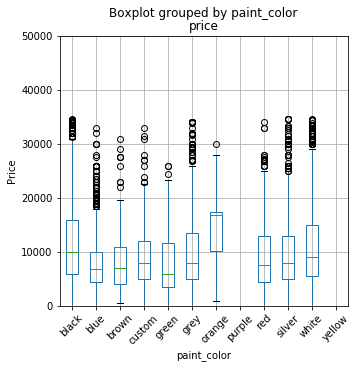

In [68]:
suv_filtered_color = suv_df[suv_df.paint_color.isin(["purple", "yellow"]) == False]
fig, ax = plt.subplots(figsize=(5,5))
suv_filtered_color.boxplot(column=['price'], by='paint_color', grid=True, rot=45, ax=ax)
plt.ylabel('Price')
plt.ylim(0, 50000)

We can see some differences in prices for different colors, maybe orange is more popular than other colors.

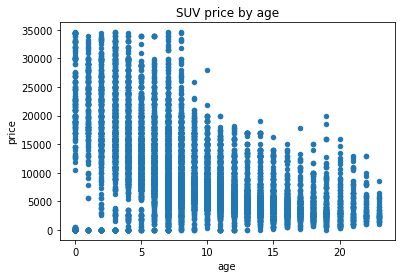

In [69]:
suv_df.plot(x='age', y='price', kind='scatter') 
plt.title('SUV price by age')
plt.show()

We can see clearly that the age is a significant factor of price, as we saw in the table before.

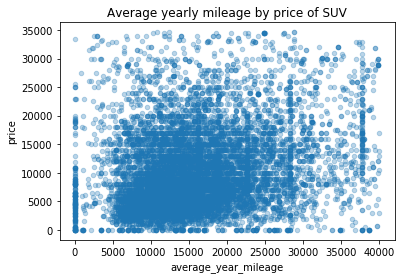

In [70]:
suv_df.plot(x='average_year_mileage', y='price', kind='scatter', alpha=0.3) 
plt.title('Average yearly mileage by price of SUV')
plt.show()

We can't see here a clear influence of average yearly mileage on the price.

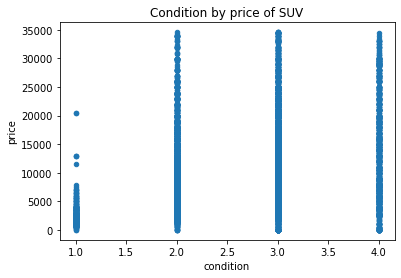

In [71]:
suv_df.plot(x='condition', y='price', kind='scatter') 
plt.title('Condition by price of SUV')
plt.show()

We can see here some influence of condition on the price, especially when the condition is bad.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

## Overall conclusion
<a class="anchor" id="conclusion"></a> 
[Go back to the Table of Contents](#table_of_contents) 

First, I opened the dataset to get fisrt impression of the data I have. I did preproccessing of missing values and replacing them with others. The next step was to change the data types of several columns in order to make calculations more easily and also for saving memory.

After finishing with preprocessing, I made some calculations and added several columns to the dataset: day of the week, month, year, vehicle's age, vehicle's average mileage per year. In addition, I replaced string values with a numeric scale in the condition column.

Afterwards, I carried out exploratory data analysis. I plotted histograms in order to see the frequencies of: price, vehicle's age, mileage, number of cylinders, and condition. Then I took a look at the ouliers in each of these parameters.I determined the limits of the ouliers, removed and stored them in a different DataFrame and continued the analysis with the filtered data. I draw new histograms for the same parameters and compared them to the old ones, to see the effect of ouliers on the distributions. 

I studied how many days advertisements were displayed (days_listed )and plotted a 
histogram. I described the typical lifetime of an ad but I didn't succed to determine when ads were removed quickly, and when they were listed for an abnormally long time. I didn't see any correlations there.

I analyzed the number of ads and the average price for each type of vehicle and then plotted a graph showing the dependence of the number of ads on the vehicle type. I selected the two types with the greatest number of ads: sedan and SUV.

**To answer our research question: What factors impact the price most?:**

Of the numeric variables:
* Age is the most significant factor influencing the price both of sedan and SUV (-0.6, -0.56 respectively).
* Odometer is also a significant factor, but I saw it only in SUV (-0.48).
* Average yearly mileage and condition have weak correlation with the price in both types (0.2, 0.26).
* Is_4wd weak has very weak correlation with the price (0.12), but only in SUV.
* The other correlations are too weak.

Of the categorical variables:
* Transmission type has some correlation with the price: automatic is more expensive (I saw that only in sedan).
* Paint color doesn't look like it has correlation, although there are little differences. 



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You have made an excellent conclusion, good job!
</div>

# Project completion checklist
<a class="anchor" id="checklist"></a> 
[Go back to the Table of Contents](#table_of_contents) 

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn